In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.models import Sequential, load_model
import time
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
seed = 1
np.random.seed(seed)

In [3]:
dataset = pd.read_excel(r'C:/Users/Acer/Desktop/Research/Market indices DailyOneSector.xlsx', header =0)
dataset.head()


,Date,ASPI,Banks_finance_insurance
0,1985-01-02,96.09,84.88
1,1985-01-03,96.08,85.07
2,1985-01-04,96.05,85.07
3,1985-01-07,96.18,86.82
4,1985-01-08,96.34,87.58


In [4]:
dataset['date_year'] = dataset['Date'].dt.year
dataset['date_month'] = dataset['Date'].dt.month
dataset['date_day'] = dataset['Date'].dt.day

In [5]:
dataset.head()

,Date,ASPI,Banks_finance_insurance,date_year,date_month,date_day
0,1985-01-02,96.09,84.88,1985,1,2
1,1985-01-03,96.08,85.07,1985,1,3
2,1985-01-04,96.05,85.07,1985,1,4
3,1985-01-07,96.18,86.82,1985,1,7
4,1985-01-08,96.34,87.58,1985,1,8


In [6]:
dataset = dataset[['ASPI','Banks_finance_insurance','date_year','date_month','date_day']]
dataset

,ASPI,Banks_finance_insurance,date_year,date_month,date_day
0,96.09,84.88,1985,1,2
1,96.08,85.07,1985,1,3
2,96.05,85.07,1985,1,4
3,96.18,86.82,1985,1,7
4,96.34,87.58,1985,1,8
...,...,...,...,...,...
7708,5974.94,14504.04,2017,3,27
7709,5985.08,14513.48,2017,3,28
7710,6021.54,14578.73,2017,3,29
7711,6040.18,14575.46,2017,3,30


In [7]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X)
print(y)


[[   84.88]
 [   85.07]
 [   85.07]
 ...
 [14578.73]
 [14575.46]
 [14748.99]]
[1985 1985 1985 ... 2017 2017 2017]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
X_train.shape

(5399, 1)

In [10]:
y_train.shape

(5399,)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
classifier = Sequential()
classifier.add(Dense(output_dim = 9, init = 'uniform',  input_dim = 1))
classifier.add(Dense(output_dim = 9, init = 'uniform'))
classifier.add(Dense(1))
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','mse'])
history=classifier.fit(X_train, y_train,validation_data =[X_test,y_test], batch_size = 10, nb_epoch = 100)
classifier.save('stock_prediction4.h5')

C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=9, kernel_initializer="uniform")`
  
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=9, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5399 samples, validate on 2314 samples
Epoch 1/100
5399/5399 [==============================] - 2s 306us/step - loss: 1971.9501 - mean_absolute_error: 1971.9500 - mse: 3889677.2500 - val_loss: 1888.9887 - val_mean_absolute_error: 1888.9890 - val_mse: 3568366.5000
Epoch 2/100
5399/5399 [==============================] - 1s 270us/step - loss: 1611.4523 - mean_absolute_error: 1611.4519 - mse: 2636511.7500 - val_loss: 1200.1236 - val_mean_absolute_error: 1200.1237 - val_mse: 1440382.0000
Epoch 3/100
5399/5399 [==============================] - 1s 238us/step - loss: 521.7525 - mean_absolute_error: 521.7520 - mse: 436875.8750 - val_loss: 4.6572 - val_mean_absolute_error: 4.6572 - val_mse: 28.1387
Epoch 4/100
5399/5399 [==============================] - 1s 237us/step - loss: 4.7763 - mean_absolute_error: 4.7763 - mse: 30.8549 - val_loss: 4.7271 - val_mean_absolute_error: 4.7272 - val_mse: 29.8905
Epoch 5/100
5399/5399 [==============================] - 1s 243us/step - loss: 4.7978 - 

Epoch 41/100
5399/5399 [==============================] - 1s 243us/step - loss: 4.7031 - mean_absolute_error: 4.7031 - mse: 29.7659 - val_loss: 4.7055 - val_mean_absolute_error: 4.7055 - val_mse: 28.6428
Epoch 42/100
5399/5399 [==============================] - 1s 233us/step - loss: 4.7767 - mean_absolute_error: 4.7767 - mse: 30.9520 - val_loss: 4.9231 - val_mean_absolute_error: 4.9231 - val_mse: 35.3792
Epoch 43/100
5399/5399 [==============================] - 1s 235us/step - loss: 4.7466 - mean_absolute_error: 4.7466 - mse: 30.6364 - val_loss: 4.9305 - val_mean_absolute_error: 4.9305 - val_mse: 31.5438
Epoch 44/100
5399/5399 [==============================] - 1s 250us/step - loss: 4.7090 - mean_absolute_error: 4.7090 - mse: 30.1768 - val_loss: 5.7166 - val_mean_absolute_error: 5.7166 - val_mse: 53.6844
Epoch 45/100
5399/5399 [==============================] - 1s 240us/step - loss: 4.7795 - mean_absolute_error: 4.7795 - mse: 31.4735 - val_loss: 4.8665 - val_mean_absolute_error: 4.8665

In [15]:
classifier = load_model('stock_prediction4.h5')

In [16]:
MAE,mse,loss = classifier.evaluate(X_test,y_test)
MAE

2314/2314 [==============================] - 0s 44us/step


5.007975928620624

In [25]:
classifier = Sequential()
classifier.add(Dense(output_dim = 9, init = 'uniform',  input_dim = 1))
classifier.add(Dense(output_dim = 9, init = 'uniform'))
classifier.add(Dense(1))
classifier.compile(loss='mape', optimizer='adam', metrics=['mape'])
history=classifier.fit(X_train, y_train,validation_data =[X_test,y_test], batch_size = 10, nb_epoch = 100)
classifier.save('stock_prediction6.h5')

C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=9, kernel_initializer="uniform")`
  
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=9, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5399 samples, validate on 2314 samples
Epoch 1/100
5399/5399 [==============================] - 1s 276us/step - loss: 98.4762 - mape: 98.4762 - val_loss: 94.1748 - val_mape: 94.1748
Epoch 2/100
5399/5399 [==============================] - 1s 268us/step - loss: 80.0746 - mape: 80.0746 - val_loss: 59.2647 - val_mape: 59.2648
Epoch 3/100
5399/5399 [==============================] - 1s 254us/step - loss: 25.3224 - mape: 25.3224 - val_loss: 0.2435 - val_mape: 0.2435
Epoch 4/100
5399/5399 [==============================] - 1s 247us/step - loss: 0.2384 - mape: 0.2384 - val_loss: 0.2447 - val_mape: 0.2447
Epoch 5/100
5399/5399 [==============================] - 1s 241us/step - loss: 0.2400 - mape: 0.2400 - val_loss: 0.2363 - val_mape: 0.2363
Epoch 6/100
5399/5399 [==============================] - 1s 233us/step - loss: 0.2376 - mape: 0.2376 - val_loss: 0.2361 - val_mape: 0.2361
Epoch 7/100
5399/5399 [==============================] - 1s 227us/step - loss: 0.2395 - mape: 0.2395 - val_l

In [26]:
mape,MAPE = classifier.evaluate(X_test,y_test)
mape

2314/2314 [==============================] - 0s 36us/step


0.2620604806994197

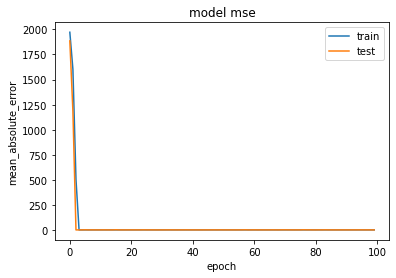

In [106]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mse')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [98]:
classifier = Sequential()
classifier.add(Dense(output_dim = 9, init = 'uniform',  input_dim = 1))
classifier.add(Dense(output_dim = 9, init = 'uniform'))
classifier.add(Dense(1))
classifier.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
history=classifier.fit(X_train, y_train,validation_data =[X_test,y_test], batch_size = 10, nb_epoch = 100)
classifier.save('stock_prediction4.h5')

C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=9, kernel_initializer="uniform")`
  
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=9, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5399 samples, validate on 2314 samples
Epoch 1/100
5399/5399 [==============================] - 1s 233us/step - loss: 3886909.6019 - mse: 3886911.0000 - val_loss: 3564921.1106 - val_mse: 3564920.0000
Epoch 2/100
5399/5399 [==============================] - 1s 196us/step - loss: 2700652.9342 - mse: 2700651.2500 - val_loss: 1652483.9802 - val_mse: 1652484.0000
Epoch 3/100
5399/5399 [==============================] - 1s 190us/step - loss: 769370.5370 - mse: 769370.5000 - val_loss: 171818.2915 - val_mse: 171818.3281
Epoch 4/100
5399/5399 [==============================] - 1s 189us/step - loss: 42741.3240 - mse: 42741.3242 - val_loss: 1448.7846 - val_mse: 1448.7847
Epoch 5/100
5399/5399 [==============================] - 1s 197us/step - loss: 248.3352 - mse: 248.3353 - val_loss: 28.4350 - val_mse: 28.4350
Epoch 6/100
5399/5399 [==============================] - 1s 215us/step - loss: 27.2107 - mse: 27.2107 - val_loss: 27.9255 - val_mse: 27.9255
Epoch 7/100
5399/5399 [===============

Epoch 58/100
5399/5399 [==============================] - 1s 194us/step - loss: 28.9271 - mse: 28.9271 - val_loss: 32.0491 - val_mse: 32.0491
Epoch 59/100
5399/5399 [==============================] - 1s 192us/step - loss: 28.8100 - mse: 28.8100 - val_loss: 29.2361 - val_mse: 29.2361
Epoch 60/100
5399/5399 [==============================] - 1s 193us/step - loss: 29.1372 - mse: 29.1372 - val_loss: 31.9572 - val_mse: 31.9572
Epoch 61/100
5399/5399 [==============================] - 1s 192us/step - loss: 28.6973 - mse: 28.6973 - val_loss: 33.4841 - val_mse: 33.4841
Epoch 62/100
5399/5399 [==============================] - 1s 195us/step - loss: 29.5213 - mse: 29.5213 - val_loss: 29.3395 - val_mse: 29.3395
Epoch 63/100
5399/5399 [==============================] - 1s 195us/step - loss: 28.6592 - mse: 28.6592 - val_loss: 28.0930 - val_mse: 28.0930
Epoch 64/100
5399/5399 [==============================] - 1s 192us/step - loss: 28.9304 - mse: 28.9304 - val_loss: 29.8946 - val_mse: 29.8946
Epoch 

In [14]:
MAE,mse = classifier.evaluate(X_test,y_test)
mse

2314/2314 [==============================] - 0s 43us/step


ValueError: too many values to unpack (expected 2)

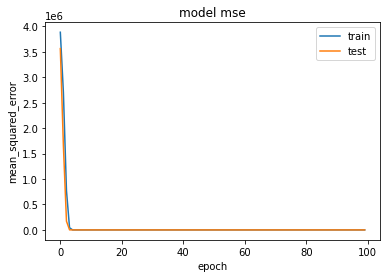

In [102]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [107]:
kf = KFold(n_splits=7)

def get_score(model, X_train, X_test, y_train, y_test):
        model.fit(X_train, y_train)
        return model.evaluate(X_test, y_test)

scores_SVM=[]

for train_index,test_index in kf.split(X,y):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scores_SVM.append(get_score(classifier, X_train, X_test, y_train, y_test))
    print(scores_SVM)


Train Index:  [1102 1103 1104 ... 7710 7711 7712] 

Test Index:  [   0    1    2 ... 1099 1100 1101]
Epoch 1/1
1102/1102 [==============================] - 0s 26us/step
[[223.2855461106759, 223.2855682373047, 50045.81640625]]
Train Index:  [   0    1    2 ... 7710 7711 7712] 

Test Index:  [1102 1103 1104 ... 2201 2202 2203]
Epoch 1/1
1102/1102 [==============================] - 0s 29us/step
[[223.2855461106759, 223.2855682373047, 50045.81640625], [352.232067405853, 352.23211669921875, 153248.96875]]
Train Index:  [   0    1    2 ... 7710 7711 7712] 

Test Index:  [2204 2205 2206 ... 3303 3304 3305]
Epoch 1/1
1102/1102 [==============================] - 0s 27us/step
[[223.2855461106759, 223.2855682373047, 50045.81640625], [352.232067405853, 352.23211669921875, 153248.96875], [303.8979954935894, 303.8980407714844, 102263.3515625]]
Train Index:  [   0    1    2 ... 7710 7711 7712] 

Test Index:  [3306 3307 3308 ... 4405 4406 4407]
Epoch 1/1
1102/1102 [==============================] - 0s